# 1. Introduction

In this notebook I will analyze the [Boston Airbnb dataset](https://www.kaggle.com/datasets/airbnb/boston) from Kaggle. It will follow the Cross Industry Standard Process for Data Mining (CRISP-DM).

## 1.1 Business Understanding

Airbnb offers a unique platform for homeowners to lease their homes or apartments for short-term lodging, making it a popular choice among travelers due to its convenience and range of options. 

This analysis delves into the Airbnb Seattle dataset, which encompasses a wide array of listings and their defining characteristics, such as property size, available amenities, neighborhood descriptions, and guest reviews.

**Analysis Questions:**

Q1. From a traveler's perspective, does a "superhost" enhance the guest experience?

Q2. What features have the most influence on the success and profitability of an Airbnb listing from an investor's standpoint?

Q3. How significantly do customer reviews influence the booking frequency of a listing?

# 2. Exploratory Data Analysis

## 2.1 Data Understanding

In [316]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import func

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)

In [317]:
# Import data
df_listings = pd.read_csv("../data/listings.csv")
df_reviews = pd.read_csv("../data/reviews.csv")

for data in [df_listings,df_reviews]:
    display(data.head(3))
    print(data.shape)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

(3585, 95)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


(68275, 6)


After going through the [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) provided by [Insider Airbnb](http://insideairbnb.com/data-assumptions) , I got a clearer picture of the dataset and picked out the key features I'll need for answering our main questions.

- The calendar dataset shows prices and availability for listings for the next year. It's more about what hosts plan to do in the future, so I'm skipping this data for my analysis.

- In the listings dataset, there's a lot of info about what each lisitng offers. The column **"_host_issuperhost"** will be useful in answering the first question (Q1).

- The reviews dataset provides customer comments and the dates they were left. I can model the sentiment of these reviews to help answer the third question (Q3). There are also 7 **"review_scores"** metrics within the listings dataset that will be helpful for the third question (Q3)

- For the second question (Q2) about how popular or full places are, I would like to use price and occupancy to compare success by total revenue, but occupancy isn't tracked. Thankfully, Inside Airbnb has already looked into the issue of modeling occupancy and suggest using "a Review Rate of 50%" to approximate bookings from the number of reviews. So, I'm going to use the **"_reviews_per_month"** column to estimate of how many times a place gets booked to gauge a listing's success.







## 2.2 Data Preparation

### 2.2.1 Feature Selection

In [318]:
clean_reviews = df_reviews.copy()
clean_listings = df_listings.copy()

# Get creation date if dataframe for calculating days from date
listing_last_scraped = pd.Timestamp(clean_listings.last_scraped[0])

# Drop columns with all NaN
print('dropping empty columns')
clean_listings.dropna(axis=1, how="all", inplace=True)

# Drop columns with only one unique value (no variation)
static_col = [c for c in clean_listings.columns if clean_listings[c].nunique()==1]
print('dropping static columns: {}'.format(static_col))
clean_listings.drop(static_col, axis=1, inplace=True)

# Check for columns with many NaN
(clean_listings.isna().mean()).sort_values()

# Drop sq.ft.
print('dropping square footage')
clean_listings.drop('square_feet',axis=1,inplace=True)


dropping empty columns
dropping static columns: ['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'country_code', 'country', 'calendar_last_scraped', 'requires_license']
dropping square footage


In [319]:
clean_listings.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.

In [320]:
clean_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   name                              3585 non-null   object 
 3   summary                           3442 non-null   object 
 4   space                             2528 non-null   object 
 5   description                       3585 non-null   object 
 6   neighborhood_overview             2170 non-null   object 
 7   notes                             1610 non-null   object 
 8   transit                           2295 non-null   object 
 9   access                            2096 non-null   object 
 10  interaction                       2031 non-null   object 
 11  house_rules                       2393 non-null   object 
 12  thumbn

In [321]:
### Select features relevant to questions
features_host = ['host_is_superhost','host_about','host_response_time','host_response_rate', 'host_listings_count',
                    'host_verifications','host_has_profile_pic','host_identity_verified','host_since',
                    'calculated_host_listings_count']

features_property = ['id','name','summary','space','description','neighborhood_overview','notes','transit',
                        'access','interaction','house_rules', 'street','neighbourhood','zipcode','latitude',
                        'longitude','is_location_exact','property_type','room_type','accommodates','bathrooms',
                        'bedrooms','beds','bed_type','amenities','price','weekly_price','security_deposit',
                        'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights']

features_traveler = ['number_of_reviews','last_review','first_review','review_scores_rating',
                        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                        'review_scores_communication','review_scores_location','review_scores_value',
                        'instant_bookable','cancellation_policy','require_guest_profile_picture',
                        'require_guest_phone_verification','reviews_per_month']

features = features_host + features_property + features_traveler
clean_listings = clean_listings[features]

**Data Wrangling Checklist**
- Get days from date
    - host_since
    - last_review
    - first_review
- Convert to numeric
    - host_response_time
    - host_response_rate
    - price
    - weekly_price
    - security_deposit
    - cleaning_fee
    - extra_people
- Convert to bool
    - host_is_superhost
    - host_has_profile_pic
    - host_identity_verified
    - is_location_exact
    - instant_bookable
    - require_guest_profile_picture
    - require_guest_phone_verification
- Convert to catagory
    - property_type
    - room_type
    - bed_type
    - cancellation_policy
- candidates for encoding
    - amenities
- Count host_verifications
    - host_verifications

### 2.2.2 Convert Data Types 

In [322]:
# Get days from dates
for c in ['host_since', 'last_review', 'first_review']:
    new_col = c + '_deltaDays'
    clean_listings[new_col] = (pd.to_datetime(listing_last_scraped)-pd.to_datetime(clean_listings[c])).dt.days
    clean_listings.drop(c, axis=1, inplace=True)

In [323]:
# Convert host response time
clean_listings.host_response_time = \
    clean_listings.host_response_time.map({"within an hour":1,"within a few hours":12,
                                            "within a day":24,"a few days or more":48})

# Convert host_response_rate to float
clean_listings.host_response_rate = clean_listings.host_response_rate.str.replace('%','').astype('float')

In [324]:
# Convert prices to floats
for c in ['price', 'weekly_price', 'security_deposit', 'cleaning_fee', 'extra_people']:
    clean_listings[c] = clean_listings[c].str.replace('$','').str.replace(",","").astype('float')

In [325]:
# Convert numeric features to float
clean_listings.id = clean_listings.id.astype('str')
num_feats = clean_listings.select_dtypes('number').columns

for f in num_feats:
    clean_listings[f] = clean_listings[f].astype('float32')

In [326]:
# Convert boolean features
bool_feats = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
                    'instant_bookable','require_guest_profile_picture','require_guest_phone_verification',]

for f in bool_feats:
    clean_listings[f] = clean_listings[f].map({'t':1, 'f':0}).astype('bool')

In [327]:
# Convert catagories
catagories = ['property_type','room_type','bed_type','cancellation_policy']

for c in catagories:
    clean_listings[c] = clean_listings[c].astype('category')

### 2.2.3 Deal with lists

In [328]:
# Create a feature count the number of host verification methods
clean_listings['host_verificationCount'] = clean_listings.host_verifications.apply(
                                            lambda x: len(x.strip('][').split(', ')))
clean_listings.drop('host_verifications', axis=1, inplace=True)

In [329]:
### One-hot encode amenities matrix
amenities_matrix = []

for i, list in enumerate(clean_listings.amenities):
    list = list.strip('{}').replace('"','').replace(' ','_').lower().split(',')
    new_row = {}
    for amenity in list:
        new_col = "amenity_" + amenity
        new_row[new_col] = 1
    amenities_matrix.append(new_row)
    
amenities_df = pd.DataFrame(amenities_matrix)
amenities_df.fillna(0, inplace=True)

# Drop amenity features with mean < 5% to reduce overfitting
drop_threshold = amenities_df.mean() > .05
amenities_df = amenities_df.loc[:, drop_threshold]

# Add amenity features to cleaned listings df & drop original col
clean_listings = pd.concat([clean_listings, amenities_df], axis=1)
clean_listings.drop('amenities', axis=1, inplace=True)

### 2.2.4 Handle Missing Values

In [330]:
# Fill nan reviews with empty string
clean_reviews.isna().sum() # some people left an empty reviews
clean_reviews.fillna('', inplace=True)

In [331]:
# Review columns w/ nan values
clean_listings.loc[:, (clean_listings.isna().sum() != 0)].isna().mean().sort_values(ascending=False)

weekly_price                   0.751185
security_deposit               0.625662
notes                          0.550907
interaction                    0.433473
access                         0.415342
neighborhood_overview          0.394700
host_about                     0.365132
transit                        0.359833
house_rules                    0.332497
cleaning_fee                   0.308787
space                          0.294840
review_scores_accuracy         0.229568
review_scores_location         0.229289
review_scores_value            0.229010
review_scores_checkin          0.228731
review_scores_communication    0.228173
review_scores_cleanliness      0.228173
review_scores_rating           0.226778
reviews_per_month              0.210879
last_review_deltaDays          0.210879
first_review_deltaDays         0.210879
neighbourhood                  0.151464
host_response_time             0.131381
host_response_rate             0.131381
summary                        0.039888


**Columns with few nan**

There are several columns with 1% or less of missing values. These aren't enough to have a significant impact on the data and can just be dropped

In [332]:
clean_listings.dropna(subset = ['zipcode','bathrooms','bedrooms','beds','property_type'], axis=0, inplace=True)

**Missing currency values**
- weekly_price (75% missing)
- security_deposit (62% missing)
- cleaning_fee (31% missing)

Given that "price" has no missing values, it seems likely the reason for the missing values above is because the host has chosen not to include those rates. Thus it would be helpful to engineer new bool features that specify whether that rate variable exists. But we still have to handle the original columns.

The missing rates are high, so removing the rows with NaN values via complete case analysis would leave us with little data left. That leaves us two options: remove the columns or impute the missing values.  

It is likely that these variables have a linear relationship with "price" and possibly other features, so we can explore using a linear regression model to predict and impute the missing values.

When a linear relationship is not present (determined by R-squared), we can fall back on the median of the data if there is not a high % of missing values, otherwise we will just drop the column.

In [333]:
# Create rate boolean columns
for col in ['weekly_price','security_deposit','cleaning_fee']:
    new_col = 'has_' + col
    clean_listings[new_col] = clean_listings[col].notna()

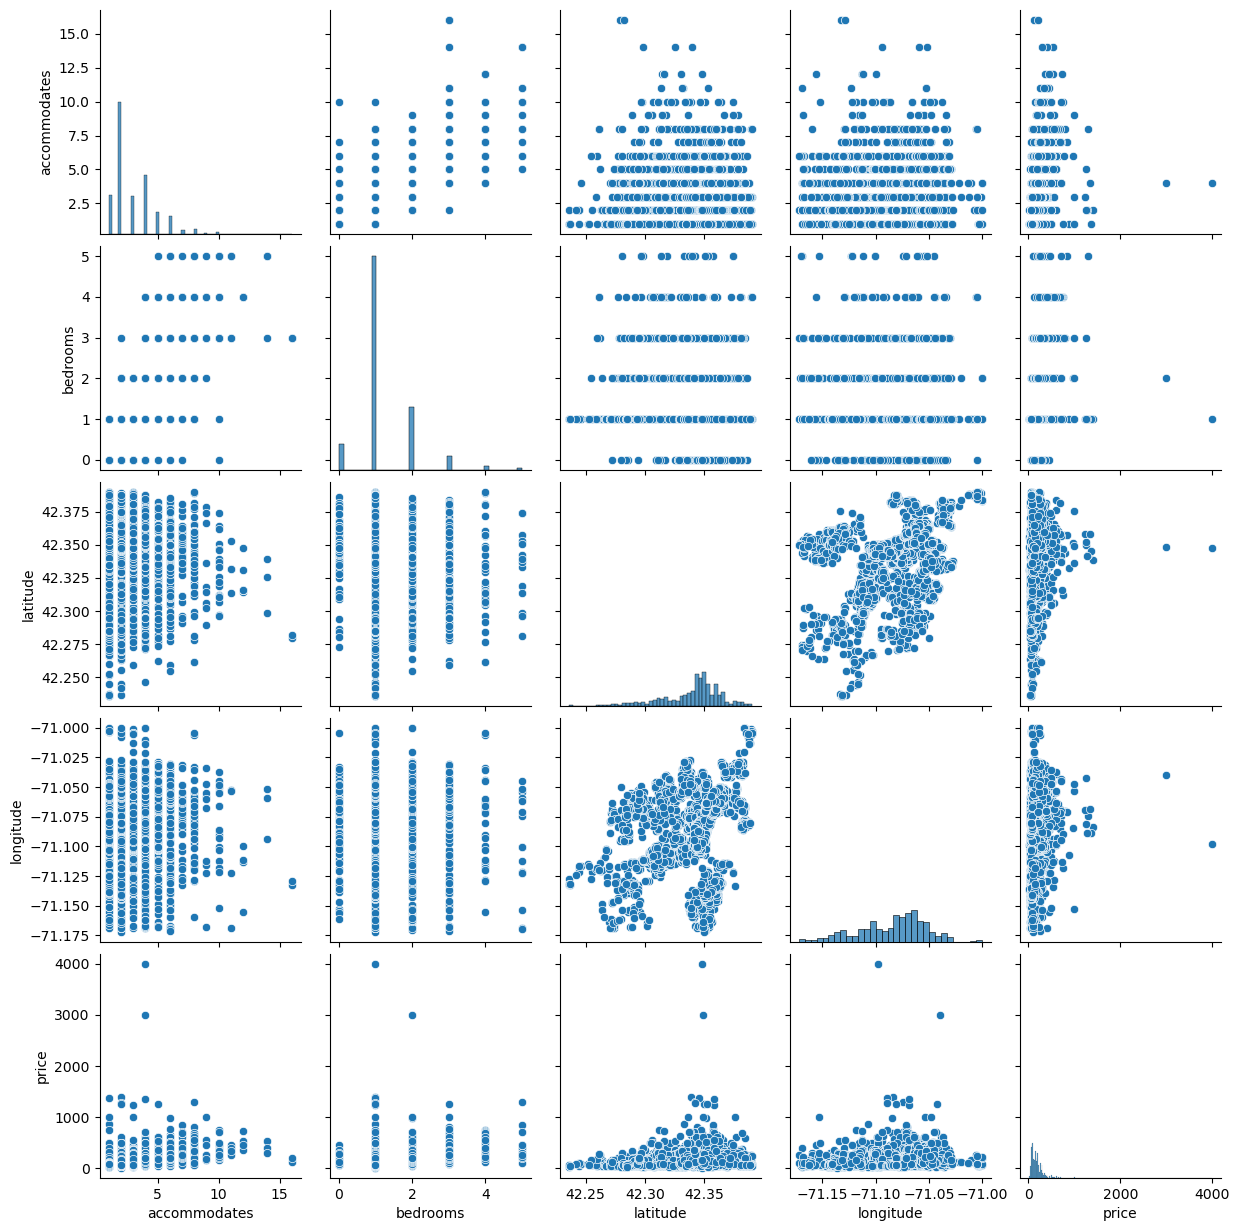

In [334]:
# Review feature relationships to avoid multicollinearity
sns.pairplot(clean_listings[['accommodates','bedrooms','latitude','longitude','price']]);

In [335]:
# Review feasability for linear regression to impute missing weekly price
parameters = ['accommodates','price']

func.is_linear_relationship(clean_listings, parameters, target='weekly_price')
func.is_linear_relationship(clean_listings, parameters, target='security_deposit')
func.is_linear_relationship(clean_listings, parameters, target='cleaning_fee')


R-squared of weekly_price is 0.8381906499872516. Impute na w/ linear regression.
R-squared of security_deposit is 0.19191141134099088. Impute na w/ mean or drop column.
R-squared of cleaning_fee is 0.2537919542567968. Impute na w/ mean or drop column.


In [336]:
# Fit regression model
X = clean_listings.dropna()[parameters]
y = clean_listings.dropna()['weekly_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7843021261192655

In [337]:
# Impute weekly_price nan w/ linear regression model
clean_listings.loc[clean_listings.weekly_price.isna(), 'weekly_price'] = \
    reg.predict(clean_listings[parameters])[clean_listings['weekly_price'].isnull()]

In [338]:
# Impute cleaning_fee values w/ median
clean_listings.loc[clean_listings.cleaning_fee.isna(), 'cleaning_fee'] = \
    clean_listings.cleaning_fee.median()

In [339]:
# Drop security_deposit col
clean_listings.drop('security_deposit', axis=1, inplace=True)

**Missing Object values**

The object columns are basically optional text fields. They are missing because the user or host chose not to complete them. It's fine just to fill them with an empty string.

In [340]:
### Get object columns and fill na w/ empty string
objects = clean_listings.select_dtypes('object').loc[:, (clean_listings.select_dtypes('object').isna().sum() != 0)].columns
clean_listings[objects] = clean_listings[objects].fillna('')

**Missing numeric values**
- host_response_time (13% missing)
- host_response_rate (13% missing)

It makes sense these missing rates are equal, since they would both be missing if the host has not received any messages. To avoid distorting the distribution of the variables, we can impute the missing values in these with the mean.

In [341]:
# Impute missing numeric values w/ median
for col in ['host_response_time','host_response_rate']:
    clean_listings.loc[clean_listings[col].isna(), col] = \
        clean_listings[col].median()

**Review-related columns**

The columns related to reviews all share a similar missing value ratio of 21-23%, which suggests it's due to properities with zero reviews. The fact a property has zero reviews could be important information, so it's worth considering whether to drop these rows or to impute the values. One likely reason is that the listing is new to the market. 

We can assess if this is a cause by plotting the age distribution of properties with no reviews, which shows that ~50% of these properties were listed for less than two years. If this was more normally distributed we would want to try and impute the missing values. However, given how skewed it is, we're better off dropping these rows from the analysis in order to reduce uncertainty in our models.

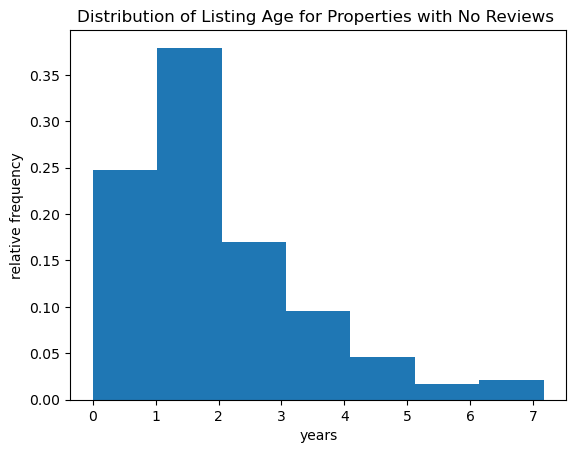

In [364]:
plt.hist((clean_listings.query("number_of_reviews==0").host_since_deltaDays/365), density=True, bins=7)
plt.title("Distribution of Listing Age for Properties with No Reviews ")
plt.xlabel("years")
plt.ylabel("relative frequency");

In [371]:
# Drop rows with missing reviews
clean_listings.dropna(subset = ['review_scores_accuracy', 'review_scores_location', 'review_scores_value'], axis=0, inplace=True)

Series([], dtype: float64)

In [372]:
# Test cleaned dataframes
assert clean_reviews.duplicated().sum() == 0
assert clean_reviews.isna().sum().sum() == 0
assert clean_listings.duplicated().sum() == 0
assert clean_listings.isna().sum().sum() == 0